
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


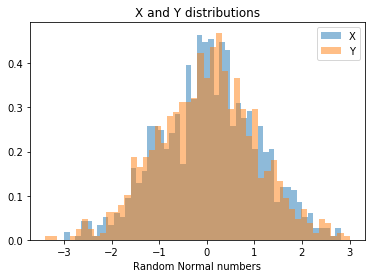

The Pearson Correlation Coefficent rxy is: -0.03395341521931209


In [58]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##

#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.random.normal(0, 1, size=1000)
y = np.random.normal(0, 1, size=1000)

_ = plt.hist(x, bins=50, normed=True, alpha=0.5)
_ = plt.hist(y, bins=50, normed=True, alpha=0.5)
_ = plt.xlabel('Random Normal numbers')
_ = plt.title('X and Y distributions')
_ = plt.legend(['X', 'Y'])
plt.show()

x_mean = np.mean(x)
y_mean = np.mean(y)

sxy=0
sx=0
sy=0
N=1000.

sx = (1/N) * np.sum((x-x_mean)**2)
sy = (1/N) * np.sum((y-y_mean)**2)
sxy = np.sum((x-x_mean)*(y-y_mean))
    

    
rxy = (1/(N-1)) * (sxy/np.sqrt(sx*sy))
print('The Pearson Correlation Coefficent rxy is: ' + str(rxy))

In [59]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.

rxy = np.zeros_like(x)

for j in range(len(rxy)):
    x = np.random.normal(0, 1, size=1000)
    y = np.random.normal(0, 1, size=1000)

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    sxy=0
    sx=0
    sy=0
    N=1000.

    sx = (1/N) * np.sum((x-x_mean)**2)
    sy = (1/N) * np.sum((y-y_mean)**2)
    sxy = np.sum((x-x_mean)*(y-y_mean))
    
    rxy[j] = (1/(N-1)) * (sxy/np.sqrt(sx*sy))

Text(0.5,1,'Pearson Correlation Coefficient')

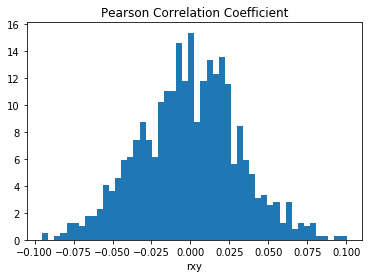

In [60]:
#3) Plot a histogram of your  $r_{xy}$ values.
plt.hist(rxy, normed=True, bins=50)
plt.xlabel('rxy')
plt.title('Pearson Correlation Coefficient')

In [61]:
#4) What is the fraction of times $|r_{xy}|$ is larger than your measured value 
#   for homework\_01\_2d-datafile.csv ?  Would you expect to find this if there 
#   were no correlation?

f0_025 = np.sum(np.absolute(rxy)>0.025)/N
f0_05 = np.sum(np.absolute(rxy)>0.05)/N
f0_08 = np.sum(np.absolute(rxy)>0.08)/N
print('The probability to get |rxy|>0.025 is: ' + str(f0_025))
print('The probability to get |rxy|>0.05 is: ' + str(f0_05))
print('The probability to get |rxy|>0.08 is: ' + str(f0_08))

df = pd.read_csv('homework_01_2d-datafile.csv')
#print(df.head())

x_mean = np.mean(df['X'])
y_mean = np.mean(df['Y'])

sxy=0
sx=0
sy=0
N=1000.

sx = (1/N) * np.sum((df['X']-x_mean)**2)
sy = (1/N) * np.sum((df['Y']-y_mean)**2)
sxy = np.sum((df['X']-x_mean)*(df['Y']-y_mean))
    
rxy_home = (1/(N-1)) * (sxy/np.sqrt(sx*sy))
print('The Pearson Correlation Coefficent rxy for homework data is: ' + str(rxy_home))

f_home = np.sum(np.absolute(rxy)>rxy_home)/N
print('The probability to get |rxy|>rxy_homework: ' + str(f_home))

print("I didn't expect to find rxy>rxy_homework because the homework's data are strongly correlated and our data are random generated.")

The probability to get |rxy|>0.025 is: 0.411
The probability to get |rxy|>0.05 is: 0.123
The probability to get |rxy|>0.08 is: 0.009
The Pearson Correlation Coefficent rxy for homework data is: 0.9503964231471844
The probability to get |rxy|>rxy_homework: 0.0
I didn't expect to find rxy>rxy_homework because the homework's data are strongly correlated and our data are random generated.


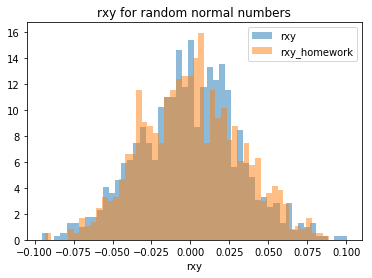

we don't have differences between the two rxy arrays because they both come from arrays of random numbers.


In [62]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?

rxy_home = np.zeros_like(rxy)

for t in range(len(rxy_home)):
    x = np.random.normal(np.mean(df['X']), np.std(df['X']), size=1000)
    y = np.random.normal(np.mean(df['Y']), np.std(df['Y']), size=1000)

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    sxy=0
    sx=0
    sy=0
    N=1000.

    sx = (1/N) * np.sum((x-x_mean)**2)
    sy = (1/N) * np.sum((y-y_mean)**2)
    sxy = np.sum((x-x_mean)*(y-y_mean))
    
    rxy_home[t] = (1/(N-1)) * (sxy/np.sqrt(sx*sy))
    
plt.hist(rxy, normed=True, bins=50, alpha=0.5)
plt.hist(rxy_home, normed=True, bins=50, alpha=0.5)
plt.xlabel('rxy')
plt.legend(['rxy', 'rxy_homework'])
plt.title('rxy for random normal numbers')
plt.show()

print("we don't have differences between the two rxy arrays because they both come from arrays of random numbers.")

In [63]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?

rxy = np.sort(rxy)
i = int(N * 0.95)
r0_95 = rxy[i]
print('The 95% upper bound (r0.95) on rxy if there is no correlation between X and Y is: ' + str(r0_95))

r_std = np.std(rxy)

f=(1/np.sqrt(2*np.pi*r_std*r_std))*np.exp(-(r0_95*r0_95)/(2*r_std*r_std))
var_r095 = (2*0.95*(1-0.95))/(N*f*f)

print('The variance Var[r0.95] is: ' + str(var_r095))

The 95% upper bound (r0.95) on rxy if there is no correlation between X and Y is: 0.052427210879095014
The variance Var[r0.95] is: 9.123213696303878e-06


In [1]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?